In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
eeg_data = pd.read_csv('C:/Users/brend/GitHubRepos/Universum/DataCollection/data/EEGdata/103/1/3/eeg_data_raw.csv')

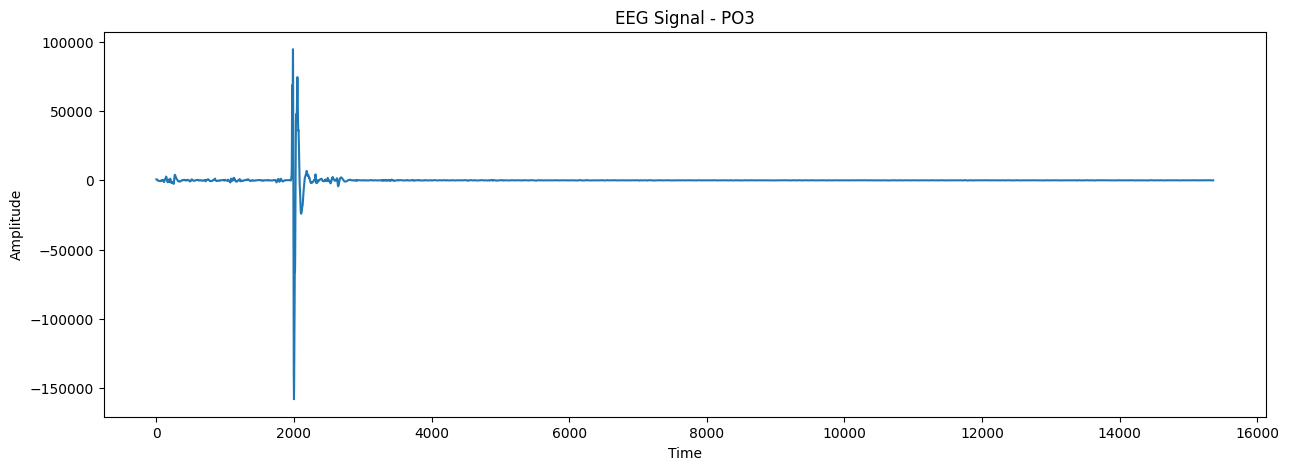

In [3]:
plt.figure(figsize=(15, 5))
plt.plot(eeg_data['PO3'])  # Replace 'Channel1' with your channel name
plt.title('EEG Signal - PO3')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [4]:
import mne
from mne.viz import plot_topomap
from mne.channels import make_standard_montage

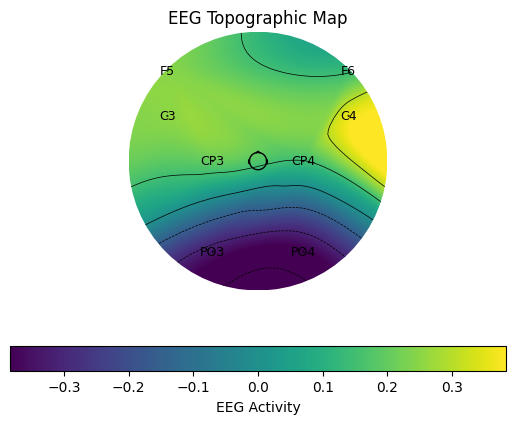

In [5]:
# Convert to NumPy and exclude timestamp
eeg_activity = eeg_data.iloc[:, 1:].values  # Exclude timestamp column

# Aggregate the data: Compute the mean across all time points
eeg_snapshot = eeg_activity.mean(axis=0)  # Shape: (8,)

# Define positions for the 8 EEG channels
positions = np.array([
    [-0.5, 0],   # CP3
    [-1, 0.5],   # C3
    [-1, 1],     # F5
    [-0.5, -1],  # PO3
    [0.5, -1],   # PO4
    [1, 1],      # F6
    [1, 0.5],    # C4
    [0.5, 0]     # CP4
])

# Define channel names
channel_names = ['CP3', 'C3', 'F5', 'PO3', 'PO4', 'F6', 'C4', 'CP4']

# Create the plot
fig, ax = plt.subplots()

# Plot the topomap for the 8 channels
im, _ = plot_topomap(eeg_snapshot, positions, axes=ax, show=False, cmap='viridis')

# Add channel names manually
for pos, name in zip(positions, channel_names):
    ax.text(pos[0], pos[1], name, fontsize=9, ha='center', va='center', color='black')

# Add a colorbar
plt.colorbar(im, ax=ax, orientation='horizontal', label="EEG Activity")
plt.title("EEG Topographic Map")
plt.show()

In [6]:
print(eeg_data.isnull().sum())

timestamp    0
CP3          0
C3           0
F5           0
PO3          0
PO4          0
F6           0
C4           0
CP4          0
dtype: int64


In [8]:
raw = mne.io.read_raw_edf('path/to/your/eeg_file.edf', preload=True)

data = raw.get_data()
channel_variances = np.var(data, axis=1)
plt.bar(raw.ch_names, channel_variances)
plt.xlabel('Channels')
plt.ylabel('Variance')
plt.title('Channel Variances')
plt.show()

NameError: name 'raw' is not defined